# Laboratorio No. 4 - Generación de Variables Aleatorias Discretas
* Ricardo Méndez 21289
* Sara Echeverría 21371
* Melissa Pérez 21385

## Parte II - Ejercicios sobre Números Aleatorios

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Task 1
Considere un experimento en el cual se cuentan cuántos carros pasan por una calle determinada dentro de un rango de tiempo dado. Sabemos que el tiempo de espera para el n-ésimo evento puede ser modelando a través de una variable gamma. Considere el caso en el que usted está esperando que pase el 3er carro en la calle dada.

1. Para diferentes lambdas en [2, 1, 0.5], grafique las distribuciones gamma para cada uno de los casos.

2. ¿Qué conclusiones puede obtener de las gráficas obtenidas en términos de los tiempos de espera y el número de ocurrencias del evento? ¿Qué relación existe entre el tiempo de espera y el número de ocurrencias de un evento?

### Task 2

Considere las siguientes dos funciones generados de pseudo randoms y responda

### Generador 1:

$$
x_n = 5^5 \cdot x_{n-1} \mod \left(2^{35} - 1\right)
$$


### Generador 2:

$$
x_n = 7^5 \cdot x_{n-1} \mod \left(2^{31} - 1\right)
$$


Y considere al generador de números aleatorios uniformes en (0, 1) default de su lenguaje de programación de
elección, como un tercer generador de números aleatorios.

### Generador 3: (baseline)

$$
x_n = \text{Math.random}()
$$


1. Construya un programa que compare estos tres generadores a través de un histograma de asteriscos (de 0
a 1 con saltos de 0.1) Use tres comparaciones para 100, 5,000 y 100,000 repeticiones.
2. ¿Qué generador le parece mejor? (considere solamente Generador 1 y Generador 2) ¿Por qué?

### Task 3

Considere la siguiente integral y responda
$$
\theta = \int_{-\infty}^{\infty} e^{-x^2} \, dx = 1.7724538509051602
$$


1. Transforme la integral a una con límites de 0 a 1, muestre su procedimiento
2. Aproxime la integral usando el método de Montecarlo, haciendo 100, 10,000 y 100,000 iteraciones.

### Task 4

Considere la siguiente integral y responda

$$
\theta = \int_{0}^{\infty} \int_{0}^{x} e^{-(x + y)} \, dy \, dx = 0.5
$$


1. Transforme la integral múltiple a una en la que ambos límites sean de 0 a 1, muestre su procedimiento
2. Aproxime la integral usando el método de Montecarlo, haciendo 100, 10,000 y 100,000 iteraciones

## Parte III - Ejercicios sobre Generación de V.A P1

### Task 1

Genere muestras aleatorias a partir de una distribución geométrica utilizando el método de transformación inversa.
1. Defina una distribución geométrica objetivo con el parámetro p=0.3
2. Implemente el método de transformación inversa para generar muestras aleatorias a partir de la
distribución geométrica.
3. Genere una muestra aleatoria de tamaño 1000 a partir de la distribución geométrica.
4. Trace un histograma de la muestra generada y compárelo con el PMF teórico de la distribución geométrica.

C:\Users\sarap\AppData\Local\Temp\ipykernel_1960\2901775005.py:15: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(k, pmf, 'r', markerfmt='ro', basefmt="r-", label='Theoretical PMF', use_line_collection=True)


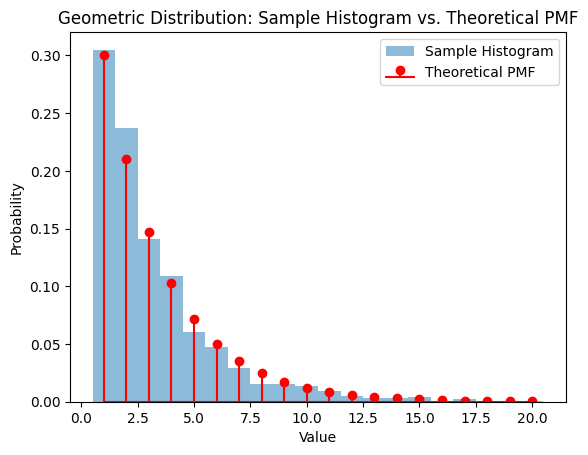

In [2]:
def generateGeometric(p, size=1):
    # generate uniform random numbers between 0 and 1
    U = np.random.uniform(0, 1, size)
    
    # apply the inverse transform method
    X = np.ceil(np.log(1 - U) / np.log(1 - p))
    return X

def plotHistogramAndPmf(samples, p):
    # calculate the histogram
    plt.hist(samples, bins=np.arange(1, max(samples)+2)-0.5, density=True, alpha=0.5, label='Sample Histogram')
    k = np.arange(1, int(max(samples))+1)
    pmf = (1 - p)**(k-1) * p
    
    plt.stem(k, pmf, 'r', markerfmt='ro', basefmt="r-", label='Theoretical PMF', use_line_collection=True)
    plt.title('Geometric Distribution: Sample Histogram vs. Theoretical PMF')
    plt.xlabel('Value')
    plt.ylabel('Probability')
    plt.legend()
    plt.show()

# parameter p for the geometric distribution and random sample generation
p = 0.3
samples = generateGeometric(p, 1000)

# plot the histogram and compare with the theoretical PMF
plotHistogramAndPmf(samples, p)

### Task 2

Investigue alguna aplicación del método de transformación inversa e implementenlo.
1. Defina la distribución que está utilizando y los parámetros de la misma
2. . Implemente el método de transformación inversa para generar muestras aleatorias a partir de la
distribución
3. Genere una muestra aleatoria de tamaño 1000 a partir de la distribución usada
4. Trace un histograma de la muestra generada y compárelo con el PMF teórico de la distribución usada

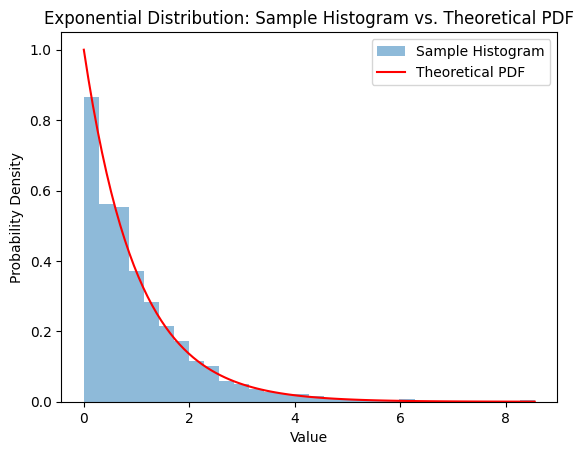

In [3]:
def generateExponential(lambdaParam, size=1):
    # generate uniform random numbers between 0 and 1
    U = np.random.uniform(0, 1, size)
    
    # apply the inverse transform method for the exponential distribution
    X = -np.log(U) / lambdaParam
    return X

def plotHistogramAndPdf(samples, lambdaParam):
    # calculate the histogram
    plt.hist(samples, bins=30, density=True, alpha=0.5, label='Sample Histogram')
    x = np.linspace(0, max(samples), 100)
    pdf = lambdaParam * np.exp(-lambdaParam * x)
    
    plt.plot(x, pdf, 'r-', label='Theoretical PDF')
    plt.title('Exponential Distribution: Sample Histogram vs. Theoretical PDF')
    plt.xlabel('Value')
    plt.ylabel('Probability Density')
    plt.legend()
    plt.show()

# lambda parameter for the exponential distribution and random sample generation
lambdaParam = 1.0
samples = generateExponential(lambdaParam, 1000)

# plot the histogram and compare with the theoretical PDF
plotHistogramAndPdf(samples, lambdaParam)